# Projeto Covid19

Importação dos dados das diferentes bases de dados disponibilizadas para analise.





### Bibliotecas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


#### [1] Dados individuais dos casos confirmados de COVID-19 no município do Rio de Janeiro que servem de base para o Painel Rio COVID-19

In [8]:

df_rj_individuais = pd.read_csv('data/RJ/Dados_indiv_MRJ_covid_19.csv',   sep=';', engine='python', encoding='ISO-8859-1')

In [9]:
print('Tamanho do dataset: ',df_rj_individuais.shape[0], ', quantidade de atributos: ', df_rj_individuais.shape[1])
df_rj_individuais.head(10)

Tamanho do dataset:  116591 , quantidade de atributos:  11


,classificação_final,dt_notific,dt_inicio_sintomas,bairro_resid__estadia,ap_residencia_estadia,sexo,faixa_etária,evolução,dt_óbito,raça/cor,Data_atualização
0,CONFIRMADO,18/09/2020,03/09/2020,PACIENCIA,5.3,M,De 50 a 59,óbito,2020-09-17,Parda,26/10/2020
1,CONFIRMADO,06/05/2020,06/05/2020,CACHAMBI,3.2,M,De 70 a 79,óbito,2020-07-05,Ignorado,26/10/2020
2,CONFIRMADO,13/06/2020,26/04/2020,MARECHAL HERMES,3.3,M,De 60 a 69,óbito,2020-05-16,Ignorado,26/10/2020
3,CONFIRMADO,13/08/2020,29/07/2020,INHOAIBA,5.2,M,De 80 a 89,óbito,2020-08-16,Parda,26/10/2020
4,CONFIRMADO,06/05/2020,05/05/2020,TIJUCA,2.2,M,De 80 a 89,óbito,2020-12-05,Branca,26/10/2020
5,CONFIRMADO,25/04/2020,25/04/2020,JACAREPAGUA,4.0,M,De 60 a 69,óbito,2020-04-25,Ignorado,26/10/2020
6,CONFIRMADO,09/05/2020,19/04/2020,BENFICA,1.0,M,De 80 a 89,óbito,2020-10-05,Ignorado,26/10/2020
7,CONFIRMADO,27/08/2020,17/08/2020,CAVALCANTE,3.3,M,De 60 a 69,óbito,2020-08-17,Branca,26/10/2020
8,CONFIRMADO,12/05/2020,26/04/2020,SANTISSIMO,5.2,F,De 60 a 69,óbito,2020-07-05,Parda,26/10/2020
9,CONFIRMADO,18/05/2020,13/05/2020,CAMPO GRANDE,5.2,M,De 70 a 79,óbito,2020-05-22,Parda,26/10/2020


#### [2] Dados individuais dos casos confirmados de COVID-19 no município do Rio de Janeiro contendo o campo "CEP". 

In [2]:
df_rj_individuais_cep = pd.read_csv('data/RJ/Dados_CEP_MRJ_covid_19.csv', sep=';',parse_dates=['dt_óbito'], engine='python', encoding='ISO-8859-1')
df_rj_individuais_cep = df_rj_individuais_cep.sort_values(by=['dt_óbito'])


In [4]:
print('Tamanho do dataset: ',df_rj_individuais_cep.shape[0], ', quantidade de atributos: ', df_rj_individuais_cep.shape[1])
df_rj_individuais_cep.head(10)

Tamanho do dataset:  102494 , quantidade de atributos:  8


,dt_notific,dt_inicio_sintomas,bairro_resid__estadia,ap_residencia_estadia,evolução,dt_óbito,CEP,Data_atualização
326,19/03/2020,16/03/2020,VILA VALQUEIRE,4.0,óbito,2020-01-04,21330500,26/10/2020
2488,03/04/2020,22/03/2020,RECREIO DOS BANDEIRANTES,4.0,óbito,2020-01-04,22795090,26/10/2020
3690,01/04/2020,18/03/2020,BANGU,5.1,óbito,2020-01-04,21840096,26/10/2020
4133,26/03/2020,25/03/2020,VILA ISABEL,2.2,óbito,2020-01-04,20560120,26/10/2020
5890,30/03/2020,27/03/2020,TIJUCA,2.2,óbito,2020-01-04,20510060,26/10/2020
4965,31/03/2020,28/03/2020,BRAS DE PINA,3.1,óbito,2020-01-04,21215575,26/10/2020
4975,01/04/2020,28/03/2020,CAMPO GRANDE,5.2,óbito,2020-01-04,23078002,26/10/2020
7610,01/04/2020,01/04/2020,PRACA SECA,4.0,óbito,2020-01-04,21320020,26/10/2020
309,25/03/2020,18/03/2020,LINS DE VASCONCELOS,3.2,óbito,2020-01-04,20720310,26/10/2020
4226,01/04/2020,25/03/2020,RECREIO DOS BANDEIRANTES,4.0,óbito,2020-01-04,22795306,26/10/2020


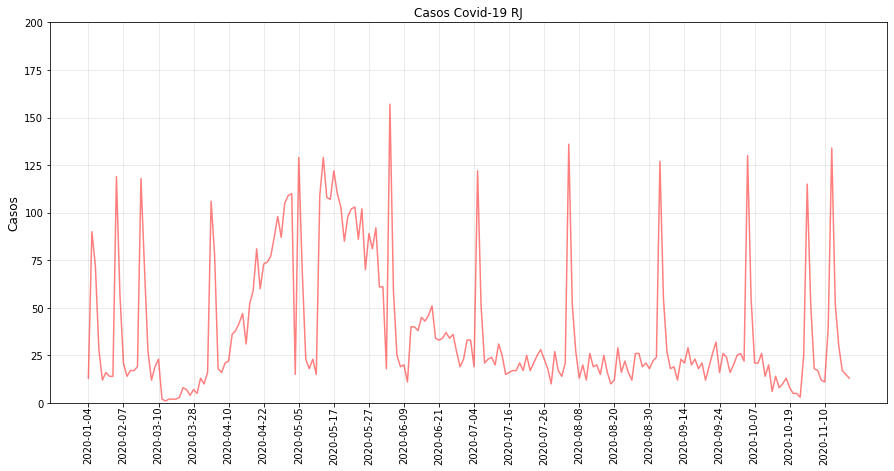

In [3]:
deceased = df_rj_individuais_cep.pivot_table(index=['dt_óbito'], aggfunc='size')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.plot(deceased.values, color = "red", alpha = .5, label = "deceased")
ax.grid(alpha = .3)
ax.set_ylim(0, 200)
xtick_location = list(range(deceased.size))[::10]
xtick_labels = list([np.datetime_as_string(d, timezone='UTC')[:10] for d in deceased.keys().values])[::10]
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
ax.set_ylabel('Casos',fontsize = 12)
ax.set_title("Casos Covid-19 RJ", fontsize = 12)
plt.savefig('covid19_rj.png')
plt.show()


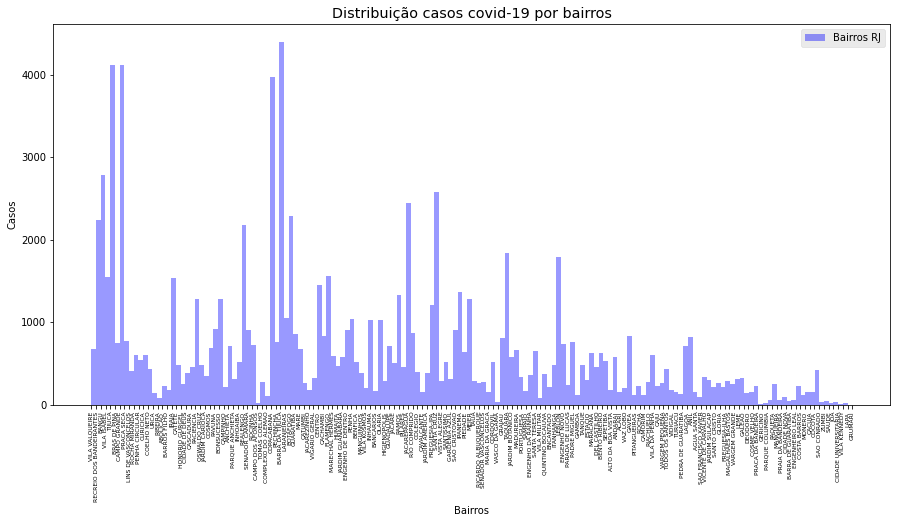

In [4]:

kwargs = dict(histtype='bar', alpha=0.4,density=False)
plt.figure(figsize=(15, 7))
plt.hist(list(df_rj_individuais_cep['bairro_resid__estadia']),
                bins=162,label='Bairros RJ', color='b',  **kwargs)
plt.style.use('ggplot')
plt.title("Distribuição casos covid-19 por bairros")
plt.xlabel('Bairros')
plt.ylabel('Casos')
plt.xticks(np.arange(162),fontsize=6,rotation=90)
plt.legend()
plt.show()

#### [3] Dados do painel de casos de doença pelo coronavirus (COVID19) no estado do RJ pela Secretaria de Estado de Saúde.

In [20]:
df_rj_dados_estado = pd.read_csv('data/RJ/COVID.CSV', sep=';', engine='python', encoding='ISO-8859-1')

In [22]:
print('Tamanho do dataset: ',df_rj_dados_estado.shape[0], ', quantidade de atributos: ', df_rj_dados_estado.shape[1])
df_rj_dados_estado.head(10)

Tamanho do dataset:  304906 , quantidade de atributos:  14


,sexo,idade,municipio_res,uf,dt_sintoma,dt_coleta_dt_notif,classificacao,evolucao,dt_obito,comorbidade,dias,dt_evento,bairro,cep
0,F,46.0,NOVA IGUACU ...,RJ,2020/05/05 00:00:00.000,2020/05/05 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,175.0,2020/05/05 00:00:00.000,NaN,26000000
1,M,23.0,MACAE ...,RJ,2020/05/03 00:00:00.000,2020/05/06 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,177.0,2020/05/03 00:00:00.000,PARQUE AEROPORTO ...,NaN
2,M,23.0,MACAE ...,RJ,2020/05/01 00:00:00.000,2020/05/03 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,179.0,2020/05/01 00:00:00.000,AJUDA DE BAIXO ...,27910000
3,M,55.0,ANGRA DOS REIS ...,RJ,2020/05/23 00:00:00.000,2020/05/23 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,157.0,2020/05/23 00:00:00.000,CENTRO ...,23900000
4,F,47.0,MARICA ...,RJ,2020/08/07 00:00:00.000,2020/08/20 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,81.0,2020/08/07 00:00:00.000,GUARATIBA ...,NaN
5,M,25.0,SAO JOAO DE MERITI ...,RJ,2020/09/07 00:00:00.000,2020/09/17 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,50.0,2020/09/07 00:00:00.000,EDEN ...,25530460
6,M,57.0,DUQUE DE CAXIAS ...,RJ,2020/06/03 00:00:00.000,2020/06/04 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,146.0,2020/06/03 00:00:00.000,PARQUE VITORIA ...,25045490
7,M,33.0,MACAE ...,RJ,2020/07/03 00:00:00.000,2020/07/03 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,116.0,2020/07/03 00:00:00.000,AEROPORTO ...,27900000
8,M,50.0,ITATIAIA ...,RJ,2020/07/20 00:00:00.000,2020/07/20 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,99.0,2020/07/20 00:00:00.000,CAMPO ALEGRE ...,27580000
9,M,42.0,ANGRA DOS REIS ...,RJ,2020/07/27 00:00:00.000,2020/08/03 00:00:00.000,CONFIRMADO,NaN,NaN,NaN,92.0,2020/07/27 00:00:00.000,PARQUE MAMBUCABA (MAMBUCABA) ...,23955570


#### [4] Dados do estado do Piaui (fornecidos por email, por Laurita dos Santos)

In [37]:
planilha = pd.ExcelFile('data/PI/PIAUI_export-16-10-2020.xlsx')
df_pi_dados_estado = pd.read_excel(planilha, sheet_name=None)

In [39]:
df_pi_dados_estado.keys()

odict_keys(['Histórico', 'Municípios'])

In [41]:
print('Tamanho do dataset: ',df_pi_dados_estado['Histórico'].shape[0], ', quantidade de atributos: ', df_pi_dados_estado['Histórico'].shape[1])
df_pi_dados_estado['Histórico'].head(10)

Tamanho do dataset:  212 , quantidade de atributos:  3


,Data,Casos Novos,Casos Acumulados
0,18/03/2020,0,0
1,19/03/2020,3,3
2,20/03/2020,1,4
3,21/03/2020,0,4
4,22/03/2020,2,6
5,23/03/2020,0,6
6,24/03/2020,2,8
7,25/03/2020,0,8
8,26/03/2020,1,9
9,27/03/2020,0,9


In [42]:
print('Tamanho do dataset: ',df_pi_dados_estado['Histórico'].shape[0], ', quantidade de atributos: ', df_pi_dados_estado['Histórico'].shape[1])
df_pi_dados_estado['Municípios'].head(10)

Tamanho do dataset:  212 , quantidade de atributos:  3


,Município,Confirmados,Óbitos,Letalidade
0,ACAUA,42,0,0.00%
1,AGRICOLANDIA,62,0,0.00%
2,AGUA BRANCA,1011,43,4.25%
3,ALAGOINHA DO PIAUI,102,2,1.96%
4,ALEGRETE DO PIAUI,261,0,0.00%
5,ALTO LONGA,184,6,3.26%
6,ALTOS,1631,24,1.47%
7,ALVORADA DO GURGUEIA,50,3,6.00%
8,AMARANTE,430,8,1.86%
9,ANGICAL DO PIAUI,149,3,2.01%


In [10]:
planilha = pd.ExcelFile('data/PI/PIAUI_Covid19 • Tabelas Painel.xlsx')
df_pi_dados_estado = pd.read_excel(planilha, sheet_name=None)

In [11]:
df_pi_dados_estado.keys()

odict_keys(['Óbito Sexo', 'Comorbidades', 'Tab Apoio', 'Conf Obito Mun', 'Casos por Dia', 'Dt Atualiza', 'Mapa', 'SRAG', 'Internações Semana', 'Conf Sexo', 'Conf Obt Fx Etária', 'TR', 'Descartados', 'Territorios', 'ProjInquerito', 'Transmissibilidade', 'Invest Laborat', 'Confirmados', 'Altas Médicas', 'Óbitos', '%Mun Casos', '% Mun Obt', 'Obt MM60', 'Internação', 'Tx Ocup LC', 'Tx Ocup UTI', 'Tx Ocup LE', 'Tx Ocup LV', 'Internações Dia', 'Virus Resp Dia', 'HistóricoDiário'])

In [13]:
print('Tamanho do dataset: ',df_pi_dados_estado['Conf Obito Mun'].shape[0], ', quantidade de atributos: ', df_pi_dados_estado['Conf Obito Mun'].shape[1])
df_pi_dados_estado['Conf Obito Mun'].head(10)

Tamanho do dataset:  225 , quantidade de atributos:  13


,id,Município,Confirmados,Óbitos,Incidência,Mortalidade,População,CEP,Território,QTDE MUN,QTDE MUN OBT,CONF,OBT
0,1.0,ACAUA,42,0,59.288538,0.000000,7084,64748000.0,VALE DO RIO GUARIBAS,224.0,177.0,105156.0,2269.0
1,2.0,AGRICOLANDIA,62,0,120.646040,0.000000,5139,64440000.0,ENTRE RIOS,NaN,NaN,NaN,NaN
2,3.0,AGUA BRANCA,1011,43,580.667394,246.970306,17411,64460000.0,ENTRE RIOS,NaN,NaN,NaN,NaN
3,4.0,ALAGOINHA DO PIAUI,102,2,133.315906,26.140374,7651,64555000.0,VALE DO RIO GUARIBAS,NaN,NaN,NaN,NaN
4,5.0,ALEGRETE DO PIAUI,261,0,531.027467,0.000000,4915,64675000.0,VALE DO RIO GUARIBAS,NaN,NaN,NaN,NaN
5,6.0,ALTO LONGA,184,6,128.635347,41.946309,14304,64360000.0,ENTRE RIOS,NaN,NaN,NaN,NaN
6,7.0,ALTOS,1631,24,402.477544,59.224163,40524,64290000.0,ENTRE RIOS,NaN,NaN,NaN,NaN
7,8.0,ALVORADA DO GURGUEIA,50,3,92.267946,55.360768,5419,64923000.0,CHAPADA DAS MANGABEIRAS,NaN,NaN,NaN,NaN
8,9.0,AMARANTE,430,8,244.345948,45.459711,17598,64400000.0,ENTRE RIOS,NaN,NaN,NaN,NaN
9,10.0,ANGICAL DO PIAUI,149,3,219.505009,44.195639,6788,64410000.0,ENTRE RIOS,NaN,NaN,NaN,NaN


#### [5] Dados nacionais sobre COVID disponibilizados pelos Cartórios de Registro Civil do Brasil. 

In [51]:
df_br_dados = pd.read_csv('data/BR/obitos-2020.csv')

In [54]:
df_br_dados = df_br_dados.loc[df_br_dados['tipo_doenca'].isin(['COVID'])]


In [55]:
print('Tamanho do dataset: ',df_br_dados.shape[0], ', quantidade de atributos: ', df_br_dados.shape[1])
df_br_dados.head(10)

Tamanho do dataset:  1982 , quantidade de atributos:  6


,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
9,AC,COVID,HOSPITAL,< 9,F,1
10,AC,COVID,HOSPITAL,< 9,M,7
34,AL,COVID,HOSPITAL,< 9,F,8
35,AL,COVID,HOSPITAL,< 9,M,4
36,AL,COVID,OUTROS_SERVICOS_SAUDE,< 9,M,1
62,AM,COVID,HOSPITAL,< 9,F,6
63,AM,COVID,HOSPITAL,< 9,M,7
90,AP,COVID,HOSPITAL,< 9,M,1
116,BA,COVID,DOMICILIO,< 9,M,1
117,BA,COVID,HOSPITAL,< 9,F,11


#### [6] Dados painel Coronavirus Brasil [Atualizado em 28/10/2020]

In [5]:
df_br_dados_painel = pd.read_csv('data/BR/HIST_PAINEL_COVIDBR_28out2020.csv', sep=';', engine='python', encoding='ISO-8859-1')

In [7]:
print('Tamanho do dataset: ',df_br_dados_painel.shape[0], ', quantidade de atributos: ', df_br_dados_painel.shape[1])
df_br_dados_painel.tail(10)

Tamanho do dataset:  1214572 , quantidade de atributos:  17


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1214562,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-19,43,3015268.0,205709,752,3561,16,NaN,NaN,1.0
1214563,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-20,43,3015268.0,206265,556,3575,14,NaN,NaN,1.0
1214564,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-21,43,3015268.0,207080,815,3587,12,NaN,NaN,1.0
1214565,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-22,43,3015268.0,207670,590,3600,13,NaN,NaN,1.0
1214566,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-23,43,3015268.0,208235,565,3613,13,NaN,NaN,1.0
1214567,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-24,43,3015268.0,208761,526,3623,10,NaN,NaN,1.0
1214568,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-25,44,3015268.0,209369,608,3633,10,NaN,NaN,1.0
1214569,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-26,44,3015268.0,210145,776,3641,8,NaN,NaN,1.0
1214570,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-27,44,3015268.0,210774,629,3653,12,NaN,NaN,1.0
1214571,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-28,44,3015268.0,211442,668,3661,8,NaN,NaN,1.0


#### [7] Casos confirmados de COVID-19 no Brasil, por municipio

In [18]:
df_br_dados_municipio = pd.read_csv('data/BR/cases-brazil-cities.csv')

In [19]:
print('Tamanho do dataset: ',df_br_dados_municipio.shape[0], ', quantidade de atributos: ', df_br_dados_municipio.shape[1])
df_br_dados_municipio.tail(10)

Tamanho do dataset:  5593 , quantidade de atributos:  16


,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
5583,Brazil,SP,Águas de São Pedro/SP,3500600,35103.0,Piracicaba,1,57,28.40102,1618.85828,0.01754,MS,2020-10-28,1,0,2020-10-28
5584,Brazil,ES,Águia Branca/ES,3200136,32001.0,Central,6,418,62.29883,4340.15159,0.01435,MS,2020-10-28,1,0,2020-10-28
5585,Brazil,SP,Álvares Florence/SP,3501202,35157.0,Votuporanga,5,70,137.09899,1919.38580,0.07143,MS,2020-10-28,1,0,2020-10-28
5586,Brazil,SP,Álvares Machado/SP,3501301,35112.0,Alta Sorocabana,8,277,32.00256,1108.08865,0.02888,MS,2020-10-28,0,0,2020-10-28
5587,Brazil,SP,Álvaro de Carvalho/SP,3501400,35093.0,Marília,4,22,75.84376,417.14069,0.18182,MS,2020-10-28,-1,0,2020-10-28
5588,Brazil,RS,Áurea/RS,4301552,43016.0,Região 16 - Alto Uruguai Gaúcho,0,23,0.00000,650.63649,0.00000,MS,2020-10-28,0,0,2020-10-28
5589,Brazil,PR,Ângulo/PR,4101150,41015.0,15ª RS Maringá,1,61,34.12969,2081.91126,0.01639,MS,2020-10-28,2,0,2020-10-28
5590,Brazil,BA,Érico Cardoso/BA,2900504,29003.0,Brumado,0,5,0.00000,47.34848,0.00000,MS,2020-10-28,0,0,2020-10-28
5591,Brazil,PA,Óbidos/PA,1505106,15002.0,Baixo Amazonas,47,2717,89.85585,5194.43276,0.01730,MS,2020-10-28,0,0,2020-10-28
5592,Brazil,SP,Óleo/SP,3533809,35094.0,Ourinhos,0,6,0.00000,242.81667,0.00000,MS,2020-10-28,0,0,2020-10-28


#### [8] Casos confirmados de COVID-19 no Brasil, por gps

In [16]:
df_br_dados_gps = pd.read_csv('data/BR/cases-gps.csv')

In [17]:
print('Tamanho do dataset: ',df_br_dados_gps.shape[0], ', quantidade de atributos: ', df_br_dados_gps.shape[1])
df_br_dados_gps.head(10)

Tamanho do dataset:  10295 , quantidade de atributos:  6


,type,name,lat,lon,total,total_per_100k_inhabitants
0,1,Abadia de Goiás/GO,-16.757264,-49.441221,650,7256.08395
1,D1,Abadia de Goiás/GO,-16.757264,-49.441221,7,78.14244
2,1,Abadia dos Dourados/MG,-18.491119,-47.406359,101,1441.62147
3,D1,Abadia dos Dourados/MG,-18.491119,-47.406359,1,14.27348
4,1,Abadiânia/GO,-16.194095,-48.706777,166,811.29955
5,D1,Abadiânia/GO,-16.194095,-48.706777,12,58.64816
6,1,Abaetetuba/PA,-1.721828,-48.878843,3303,2076.31380
7,D1,Abaetetuba/PA,-1.721828,-48.878843,115,72.29067
8,1,Abaeté/MG,-19.156683,-45.448121,76,326.88172
9,D1,Abaeté/MG,-19.156683,-45.448121,3,12.90323


#### [9] Nº de Casos por Distrito Administ(Res) segundo Dia Mês da Notific em São Paulo

In [38]:
df_sp = pd.read_csv('data/SP/casos_confirmados_distritos.csv',   sep=';', engine='python', encoding='ISO-8859-1')
df_sp = df_sp.replace('-',0)

In [40]:
print('Tamanho do dataset: ',df_sp.shape[0], ', quantidade de atributos: ', df_sp.shape[1])
df_sp.tail(10)

Tamanho do dataset:  257 , quantidade de atributos:  98


,Dia Mês da Notific,Água Rasa,Alto de Pinheiros,Anhangüera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia,Total
247,09_11,1,0,0,0,0,0,2,0,0,...,1,0,0,0,3,2,0,1,0,61
248,10_11,8,2,5,6,3,2,19,4,2,...,7,6,4,6,24,14,10,9,22,883
249,11_11,9,7,1,4,5,4,11,2,0,...,7,8,6,5,13,5,7,9,13,808
250,12_11,19,12,1,3,4,8,8,3,5,...,4,3,18,5,24,5,3,14,29,995
251,13_11,4,7,1,5,6,0,11,6,1,...,7,4,2,6,24,13,6,10,15,769
252,14_11,5,1,0,1,0,2,5,6,1,...,0,0,2,2,12,5,2,4,4,306
253,15_11,0,1,0,0,1,1,0,1,0,...,0,0,2,0,6,0,0,2,3,114
254,16_11,23,5,4,19,5,3,7,5,3,...,10,4,5,4,17,10,6,23,5,1082
255,17_11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,39
256,Total,2110,824,1387,2925,3211,660,2019,1293,663,...,1066,3599,1019,2116,3201,3135,2485,3170,2906,301467


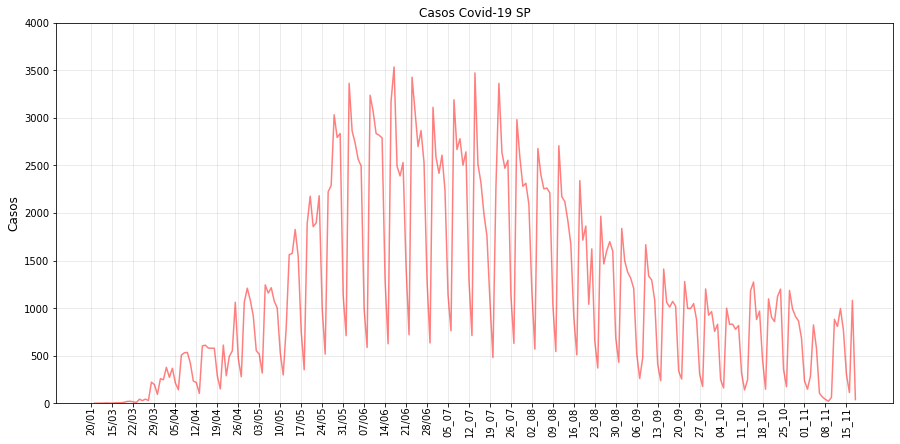

In [75]:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.plot(df_sp["Total"][1:-1], color = "red", alpha = .5, label = "cases")
ax.grid(alpha = .3)
ax.set_ylim(0, 4000)
xtick_location = df_sp.index.tolist()[::7]
xtick_labels = df_sp["Dia Mês da Notific"][1:-1].tolist()[::7]
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
ax.set_ylabel('Casos',fontsize = 12)
ax.set_title("Casos Covid-19 SP", fontsize = 12)
plt.savefig('covid19_sp.png')
plt.show()

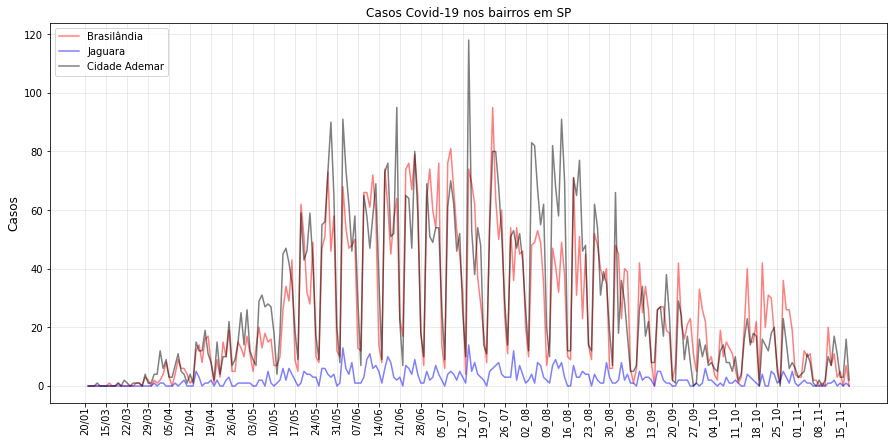

In [77]:
df_sp_bairros = df_sp.sample(n=3,axis='columns')
sp_bairros_labels = df_sp_bairros.keys().values

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.plot(df_sp_bairros[sp_bairros_labels[0]][1:-1], color = "red", alpha = .5, label = sp_bairros_labels[0])
ax.plot(df_sp_bairros[sp_bairros_labels[1]][1:-1], color = "blue", alpha = .5, label = sp_bairros_labels[1])
ax.plot(df_sp_bairros[sp_bairros_labels[2]][1:-1], color = "black", alpha = .5, label = sp_bairros_labels[2])
ax.grid(alpha = .3)
xtick_location = df_sp.index.tolist()[::7]
xtick_labels = df_sp["Dia Mês da Notific"][1:-1].tolist()[::7]
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
ax.set_ylabel('Casos',fontsize = 12)
ax.set_title("Casos Covid-19 nos bairros em SP", fontsize = 12)
ax.legend(loc = "upper left", fontsize = 10)
plt.savefig('covid19_sp_bairros.png')
plt.show()

Text(0, 0.5, 'Casos')

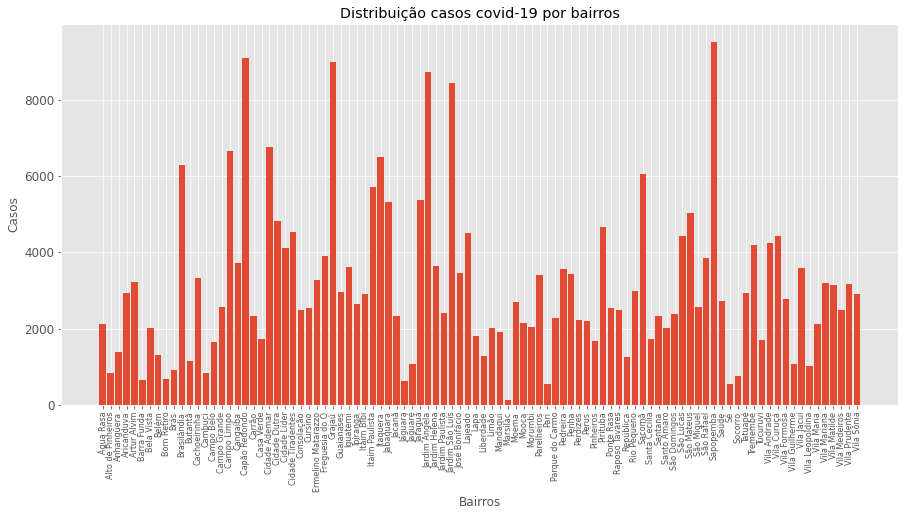

In [7]:
fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot()
ax.bar(df_sp.keys()[1:-1], list([int(i) for i in df_sp.iloc[-1][1:-1].values]))
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 8)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_title("Distribuição casos covid-19 por bairros")
ax.set_xlabel('Bairros')
ax.set_ylabel('Casos')



#### [10] Casos confirmados coronavírus no Estado do Pará

In [4]:
df_pa = pd.read_csv('data/PA/todos_os_casos.csv')

In [5]:
print('Tamanho do dataset: ',df_pa.shape[0], ', quantidade de atributos: ', df_pa.shape[1])
df_pa.head(10)

Tamanho do dataset:  263155 , quantidade de atributos:  7


,Município,Sexo,Idade,Faixa Etária,Raça,Profissional de Saúde,Óbito
0,Canaã dos Carajás,Homem,42.0,40 a 49,NaN,Não,Não
1,Belém,Homem,56.0,50 a 59,Parda,Não,Não
2,Castanhal,Homem,33.0,30 a 39,NaN,Não,Não
3,Santarém,Homem,12.0,10 a 19,Amarela,Não,Não
4,Redenção,Homem,43.0,40 a 49,NaN,Não,Não
5,Belém,Mulher,56.0,50 a 59,NaN,Sim,Não
6,Belém,Homem,47.0,40 a 49,NaN,Não,Não
7,Belém,Homem,46.0,40 a 49,NaN,Não,Não
8,Limoeiro do Ajuru,Homem,39.0,30 a 39,NaN,Não,Não
9,Breves,Mulher,47.0,40 a 49,NaN,Sim,Não
